In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models


In [2]:
lgMh = np.vstack(np.load("../../data/MW-analog/meta_data_psi4/models.npz")["mass"])
lgMs = jsm_SHMR.general([10.5, 2.0, 0.2, 0, 0, 0], lgMh, 0, 10)

In [3]:
def SSMF(lgMs_2D, lgMs_bins):
    n_ij = np.apply_along_axis(jsm_stats.cumulative, 1, lgMs_2D, mass_bins=lgMs_bins) 
    return n_ij

In [4]:
binzh = np.linspace(8.2,11.2,45)
N_hij = SSMF(lgMs,np.linspace(8.2,11.2,45))
N_hcov = np.cov(N_hij.T)

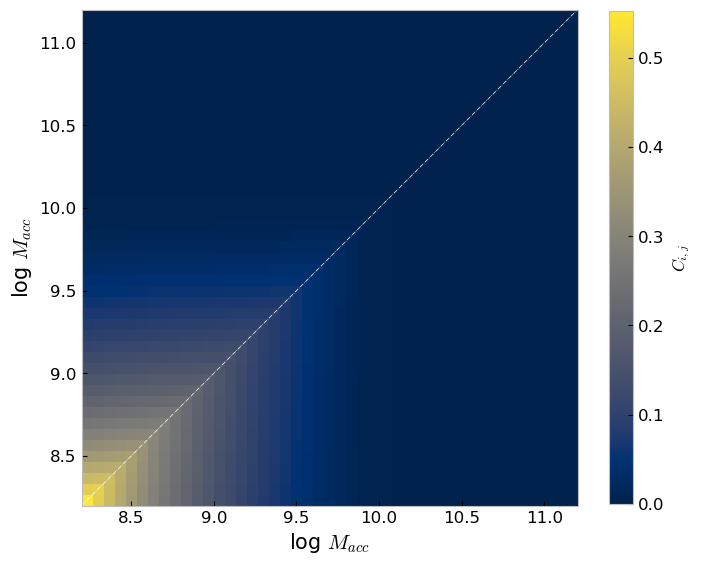

In [5]:
fig,ax=plt.subplots(figsize=(8,8))
im = ax.imshow(N_hcov, extent=[binzh.min(), binzh.max(), binzh.min(), binzh.max()], cmap="cividis", origin="lower")
ax.plot(binzh, binzh, lw=0.5, color="white", ls="-.")
ax.set_aspect(1/ax.get_data_ratio(), adjustable="box")
fig.colorbar(im, label="$C_{i,j}$",  shrink=0.8)
plt.xlabel("log $M_{acc}$", fontsize=15)
plt.ylabel("log $M_{acc}$", fontsize=15)
plt.show()

In [6]:
binz = np.linspace(4.5, 9.5, 45)
N_ij = SSMF(lgMs,binz)
N_ave = np.average(N_ij, axis=0)
N_std = np.std(N_ij, axis=0)
N_cov = np.cov(N_ij.T)

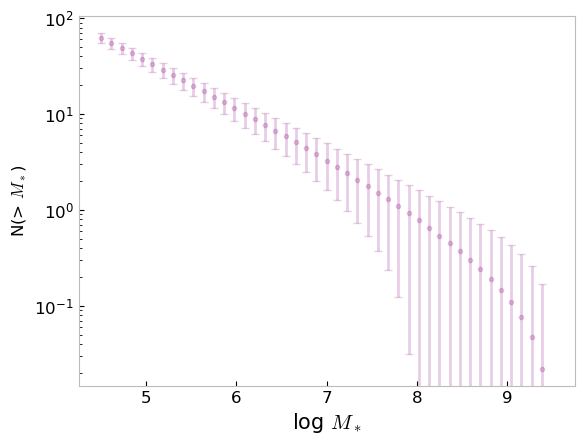

In [7]:
# for i in range(100):
#     plt.step(binz, N_ij[i], color="grey", alpha=0.1)
plt.errorbar(binz, N_ave, yerr=N_std, capsize=3, color="blue", fmt=".", alpha=0.1)
plt.errorbar(binz, N_ave, yerr=np.sqrt(np.diag(N_cov)), capsize=3, color="red", fmt=".", alpha=0.1)
plt.yscale("log")
plt.xlabel("log $M_*$", fontsize=15)
plt.ylabel("N(> $M_*$)")
plt.show()

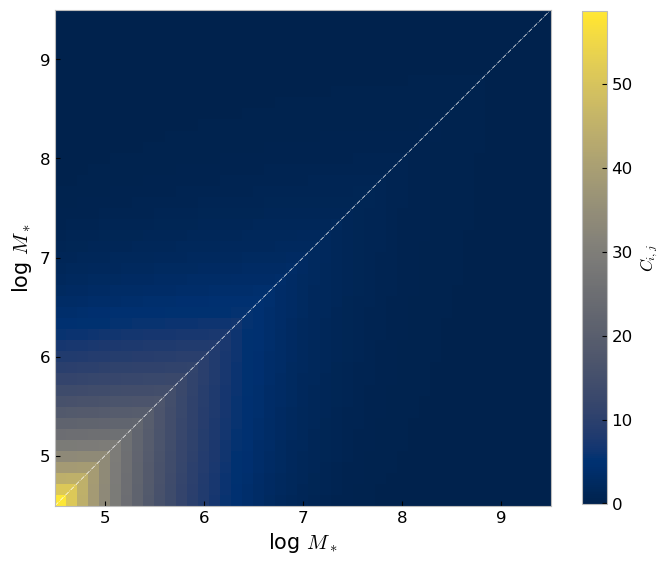

In [8]:
fig,ax=plt.subplots(figsize=(8,8))
im = ax.imshow(N_cov, extent=[binz.min(), binz.max(), binz.min(), binz.max()], cmap="cividis", origin="lower")
ax.plot(binz, binz, lw=0.5, color="white", ls="-.")
ax.set_aspect(1/ax.get_data_ratio(), adjustable="box")
fig.colorbar(im, label="$C_{i,j}$",  shrink=0.8)
plt.xlabel("log $M_*$", fontsize=15)
plt.ylabel("log $M_*$", fontsize=15)
plt.show()

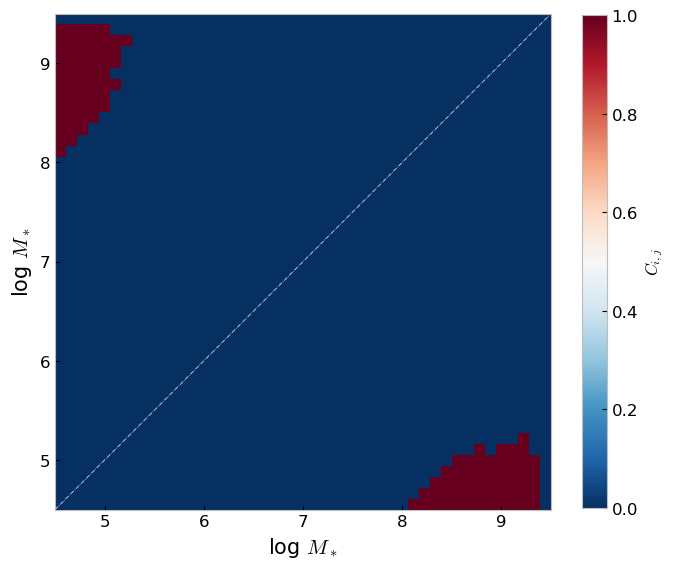

In [9]:
fig,ax=plt.subplots(figsize=(8,8))
im = ax.imshow(N_cov < 0, extent=[binz.min(), binz.max(), binz.min(), binz.max()], cmap="RdBu_r", origin="lower")
ax.plot(binz, binz, lw=0.5, color="white", ls="-.")
ax.set_aspect(1/ax.get_data_ratio(), adjustable="box")
fig.colorbar(im, label="$C_{i,j}$",  shrink=0.8)
plt.xlabel("log $M_*$", fontsize=15)
plt.ylabel("log $M_*$", fontsize=15)
plt.show()

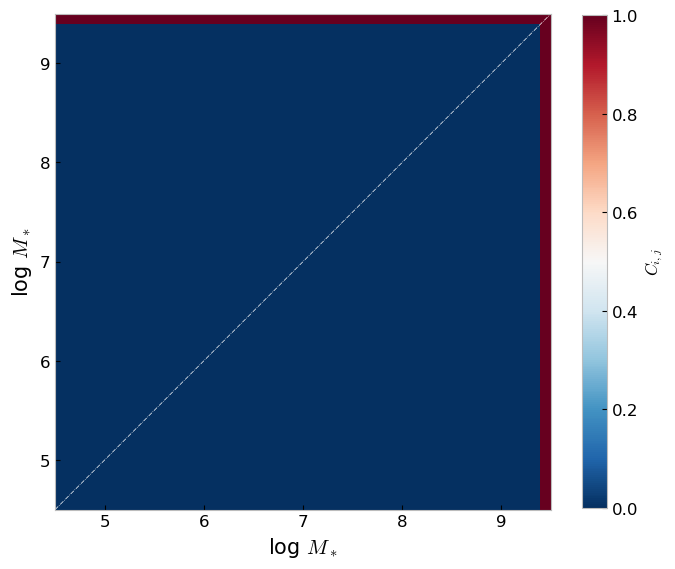

In [10]:
fig,ax=plt.subplots(figsize=(8,8))
im = ax.imshow(N_cov == 0, extent=[binz.min(), binz.max(), binz.min(), binz.max()], cmap="RdBu_r", origin="lower")
ax.plot(binz, binz, lw=0.5, color="white", ls="-.")
ax.set_aspect(1/ax.get_data_ratio(), adjustable="box")
fig.colorbar(im, label="$C_{i,j}$",  shrink=0.8)
plt.xlabel("log $M_*$", fontsize=15)
plt.ylabel("log $M_*$", fontsize=15)
plt.show()

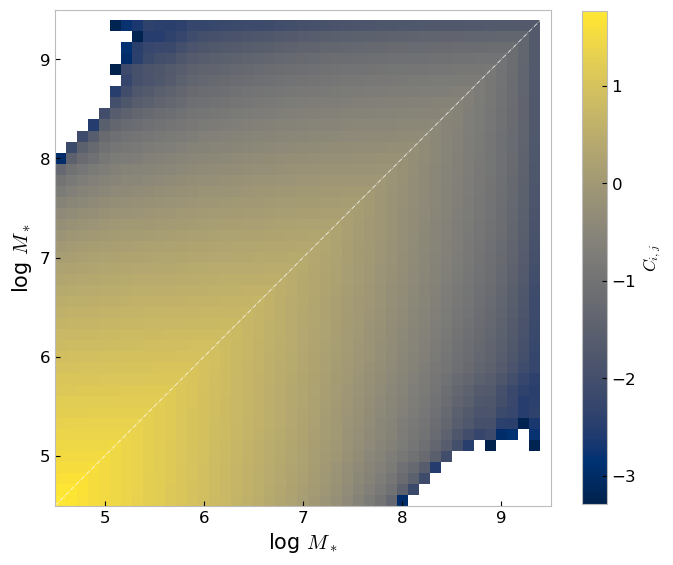

In [11]:
fig,ax=plt.subplots(figsize=(8,8))
im = ax.imshow(np.log10(N_cov), extent=[binz.min(), binz.max(), binz.min(), binz.max()], cmap="cividis", origin="lower")
ax.plot(binz, binz, lw=0.5, color="white", ls="-.")
ax.set_aspect(1/ax.get_data_ratio(), adjustable="box")
fig.colorbar(im, label="$C_{i,j}$",  shrink=0.8)
plt.xlabel("log $M_*$", fontsize=15)
plt.ylabel("log $M_*$", fontsize=15)
plt.show()